# Análise da diferença salarial para trabalhadores de TI conforme suas ocupações (CBOs).


Aqui é realizado as análises de quantidade de pessoas e diferença salarial entre homens e mulheres com funções trabalhistas de TI distribuídos em qualquer setor produtivo na cidade de Sorocaba, conforme divisão das ocupações específicas selecionadas em um recorte de 2012, 2013 e 2014.



## Etapas iniciais para realização das análises:


### Imports necessários para realização dos processamentos e análises:


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np

# Opções gerais necessárias:
pd.options.display.float_format = "{:,.2f}".format

### Variáveis inicias importantes utilizadas durante a realização dos processamentos e análises:


In [11]:
# Criando indices dos sexos:
sexo = {1: 'Masc.', 2: 'Fem.'}

# Criando indices de resumo do nome das CBOs para :
cbo = {'1236': '1236 - Diretoria', '1425': '1425 - Gerência', 
       '2122': '2122 - Engenharia', '2123': '2123 - Analistas', 
       '2124': '2124 - Técnicos', '3171': '3171 - Suporte', 
       '3172': '3172 - Administradores'}

# Variável com o nível de confiança a ser considerado e utilizado:
nivel_confianca = 0.01

# Montagem da paleta de cores utilizadas:
pal = sns.color_palette("pastel")

# Definição das cores para cada sexo (masc: verde pastel, fem: laranja pastel)
color_masc = pal[2]
color_fem = pal[1]

### Etapa de leitura dos dados das tabelas em CSV para 2012, 2013 e 2014:


In [14]:
# Leitura da tabela de dados gerais para 2012:
RAIS_GERAL_2012 = pd.read_csv("../data/SP2012.csv", sep = ";", encoding = 'utf-8', skipinitialspace = True)

# Renomeando as colunas:
RAIS_GERAL_2012.rename(columns = {'CBO Ocupação 2002':'CBO', 'CNAE 2.0 Classe':'CNAE',
                            'Escolaridade após 2005':'Escolaridade', 'Raça Cor':'Raça', 
                            'Vl Remun Dezembro Nom':'Remuneração', 'Sexo Trabalhador':'Sexo'}, inplace = True)

In [16]:
# Leitura da tabela de dados gerais para 2013:
RAIS_GERAL_2013 = pd.read_csv("../data/SP2013.csv", sep = ";", encoding = 'utf-8', skipinitialspace = True)

# Renomeando as colunas:
RAIS_GERAL_2013.rename(columns = {'CBO Ocupação 2002':'CBO', 'CNAE 2.0 Classe':'CNAE',
                            'Escolaridade após 2005':'Escolaridade', 'Raça Cor':'Raça', 
                            'Vl Remun Dezembro Nom':'Remuneração', 'Sexo Trabalhador':'Sexo'}, inplace = True)

In [18]:
# Leitura da tabela de dados gerais para 2014:
RAIS_GERAL_2014 = pd.read_csv("../data/SP2014.csv", sep = ";", encoding = 'utf-8', skipinitialspace = True)

# Renomeando as colunas:
RAIS_GERAL_2014.rename(columns = {'CBO Ocupação 2002':'CBO', 'CNAE 2.0 Classe':'CNAE',
                            'Escolaridade após 2005':'Escolaridade', 'Raça Cor':'Raça', 
                            'Vl Remun Dezembro Nom':'Remuneração', 'Sexo Trabalhador':'Sexo'}, inplace = True)

### Correção da coluna de CBO para utilização correta:


In [21]:
# Convertendo a coluna CBO de int64 para string
RAIS_GERAL_2012['CBO'] = RAIS_GERAL_2012['CBO'].apply(str)
RAIS_GERAL_2013['CBO'] = RAIS_GERAL_2013['CBO'].apply(str)
RAIS_GERAL_2014['CBO'] = RAIS_GERAL_2014['CBO'].apply(str)

# Extraindo somente os 4 primeiros caracteres (Família CBO)
RAIS_GERAL_2012['CBO'] = RAIS_GERAL_2012["CBO"].str[0:4]
RAIS_GERAL_2013['CBO'] = RAIS_GERAL_2013["CBO"].str[0:4]
RAIS_GERAL_2014['CBO'] = RAIS_GERAL_2014["CBO"].str[0:4]

### Correção da inflação do período analisado até o atual das remunerações pelo fator de correção INPC (IBGE):

In [29]:
# Foi utilizado o Índice Nacional de Preços ao Consumidor (INPC - IBGE).

# Índice de correção de inflação para o período de 12/2012 (data dos dados para 2012) 
# até 09/2024 (fator de correção mais recente no último processamento dos dados).
fator_correcao_inflacao_2012 = 1.94801240

RAIS_GERAL_2012["Remuneração"] = RAIS_GERAL_2012["Remuneração"] * fator_correcao_inflacao_2012

# Índice de correção de inflação para o período de 12/2013 (data dos dados para 2013) 
# até 09/2024 (fator de correção mais recente no último processamento dos dados).
fator_correcao_inflacao_2013 = 1.84499480

RAIS_GERAL_2013["Remuneração"] = RAIS_GERAL_2013["Remuneração"] * fator_correcao_inflacao_2013

# Índice de correção de inflação para o período de 12/2014 (data dos dados para 2014) 
# até 09/2024 (fator de correção mais recente no último processamento dos dados).
fator_correcao_inflacao_2014 = 1.73509650

RAIS_GERAL_2014["Remuneração"] = RAIS_GERAL_2014["Remuneração"] * fator_correcao_inflacao_2014

### Exibição das tabelas gerais para cada ano:


In [32]:
# Exibindo os cinco primeiros dados da tabela de 2012:
RAIS_GERAL_2012.head()

,CBO,CNAE,Faixa Etária,Escolaridade,Idade,Mun Trab,Raça,Remuneração,Sexo
0,2124,62031,4,6,26,355220,2,"9,467.34",1
1,3171,62015,6,6,41,355220,2,"2,115.54",1
2,3171,62015,5,7,39,355220,9,"2,142.81",1
3,3171,62091,3,7,21,355220,2,"4,234.98",1
4,2124,63119,4,7,26,355220,9,"4,371.34",1


In [34]:
# Exibindo os cinco primeiros dados da tabela de 2013:
RAIS_GERAL_2013.head()

,CBO,CNAE,Faixa Etária,Escolaridade,Idade,Mun Trab,Raça,Remuneração,Sexo
0,1425,62015,4,5,28,355220,9,"7,542.34",1
1,3171,62015,3,7,21,355220,9,"2,770.55",1
2,2124,62040,6,7,45,355220,2,"3,160.29",1
3,2124,62040,6,7,49,355220,2,"16,904.32",1
4,2124,62040,5,7,30,355220,4,"2,844.28",1


In [36]:
# Exibindo os cinco primeiros dados da tabela de 2014:
RAIS_GERAL_2014.head()

,CBO,CNAE,Faixa Etária,Escolaridade,Idade,Mun Trab,Raça,Remuneração,Sexo
0,2124,62091,3,2,18,355220,2,"2,630.94",1
1,3171,62015,5,6,34,355220,9,"2,236.50",1
2,3171,62015,3,6,20,355220,9,"2,342.38",1
3,3171,62015,4,6,25,355220,9,"2,654.54",1
4,3171,62091,4,7,28,355220,2,"3,520.11",1


## Análise da frequência (quantidade de pessoas) dos dados entre homens e mulheres distribuídos conforme ocupações específicas (CBOs):


### Criação das tabelas para relatório e tabela para formação do gráfico:


In [41]:
# Tabela principal para quantidade em 2012:
RAIS_GERAL_2012_QNT = pd.crosstab(RAIS_GERAL_2012["CBO"].replace(cbo), RAIS_GERAL_2012["Sexo"].replace(sexo))
RAIS_GERAL_2012_QNT.insert(1, "% Fem.", RAIS_GERAL_2012_QNT["Fem."] / (RAIS_GERAL_2012_QNT["Fem."] + RAIS_GERAL_2012_QNT["Masc."]) * 100)
RAIS_GERAL_2012_QNT.insert(3, "% Masc.", RAIS_GERAL_2012_QNT["Masc."] / (RAIS_GERAL_2012_QNT["Fem."] + RAIS_GERAL_2012_QNT["Masc."]) * 100)

RAIS_GERAL_2012_QNT.head(7)

Sexo,Fem.,% Fem.,Masc.,% Masc.
CBO,,,,
1425 - Gerência,1,7.14,13,92.86
2122 - Engenharia,0,0.00,1,100.00
2123 - Analistas,1,14.29,6,85.71
2124 - Técnicos,56,27.18,150,72.82
3171 - Suporte,10,11.90,74,88.10
3172 - Administradores,2,8.33,22,91.67


In [43]:
# Tabela principal para quantidade em 2013:
RAIS_GERAL_2013_QNT = pd.crosstab(RAIS_GERAL_2013["CBO"].replace(cbo), RAIS_GERAL_2013["Sexo"].replace(sexo))
RAIS_GERAL_2013_QNT.insert(1, "% Fem.", RAIS_GERAL_2013_QNT["Fem."] / (RAIS_GERAL_2013_QNT["Fem."] + RAIS_GERAL_2013_QNT["Masc."]) * 100)
RAIS_GERAL_2013_QNT.insert(3, "% Masc.", RAIS_GERAL_2013_QNT["Masc."] / (RAIS_GERAL_2013_QNT["Fem."] + RAIS_GERAL_2013_QNT["Masc."]) * 100)

RAIS_GERAL_2013_QNT.head(7)

Sexo,Fem.,% Fem.,Masc.,% Masc.
CBO,,,,
1425 - Gerência,2,14.29,12,85.71
2122 - Engenharia,2,33.33,4,66.67
2123 - Analistas,1,20.00,4,80.00
2124 - Técnicos,59,21.85,211,78.15
3171 - Suporte,17,13.08,113,86.92
3172 - Administradores,2,9.52,19,90.48


In [45]:
# Tabela principal para quantidade em 2014:
RAIS_GERAL_2014_QNT = pd.crosstab(RAIS_GERAL_2014["CBO"].replace(cbo), RAIS_GERAL_2014["Sexo"].replace(sexo))
RAIS_GERAL_2014_QNT.insert(1, "% Fem.", RAIS_GERAL_2014_QNT["Fem."] / (RAIS_GERAL_2014_QNT["Fem."] + RAIS_GERAL_2014_QNT["Masc."]) * 100)
RAIS_GERAL_2014_QNT.insert(3, "% Masc.", RAIS_GERAL_2014_QNT["Masc."] / (RAIS_GERAL_2014_QNT["Fem."] + RAIS_GERAL_2014_QNT["Masc."]) * 100)

RAIS_GERAL_2014_QNT.head(7)

Sexo,Fem.,% Fem.,Masc.,% Masc.
CBO,,,,
1425 - Gerência,1,4.76,20,95.24
2122 - Engenharia,1,14.29,6,85.71
2123 - Analistas,2,50.00,2,50.00
2124 - Técnicos,64,19.39,266,80.61
3171 - Suporte,21,14.69,122,85.31
3172 - Administradores,3,10.00,27,90.00


In [47]:
# Tabela para gráfico da quantidade em 2012:
RAIS_GERAL_2012_QNT.insert(4, "Total", RAIS_GERAL_2012_QNT["% Masc."] + RAIS_GERAL_2012_QNT["% Fem."])
RAIS_GERAL_2012_QNT.insert(5, "Ano", "2012")

# Tabela para gráfico da quantidade em 2013:
RAIS_GERAL_2013_QNT.insert(4, "Total", RAIS_GERAL_2013_QNT["% Masc."] + RAIS_GERAL_2013_QNT["% Fem."])
RAIS_GERAL_2013_QNT.insert(5, "Ano", "2013")

# Tabela para gráfico da quantidade em 2014:
RAIS_GERAL_2014_QNT.insert(4, "Total", RAIS_GERAL_2014_QNT["% Masc."] + RAIS_GERAL_2014_QNT["% Fem."])
RAIS_GERAL_2014_QNT.insert(5, "Ano", "2014")


# Junção das tabelas anteriores em uma para geração do gráfico:
RAIS_GERAL_QNT_GRAF = pd.concat([RAIS_GERAL_2012_QNT, RAIS_GERAL_2013_QNT, RAIS_GERAL_2014_QNT]).reset_index()

### Criação do gráfico com os dados referentes a quantidade:


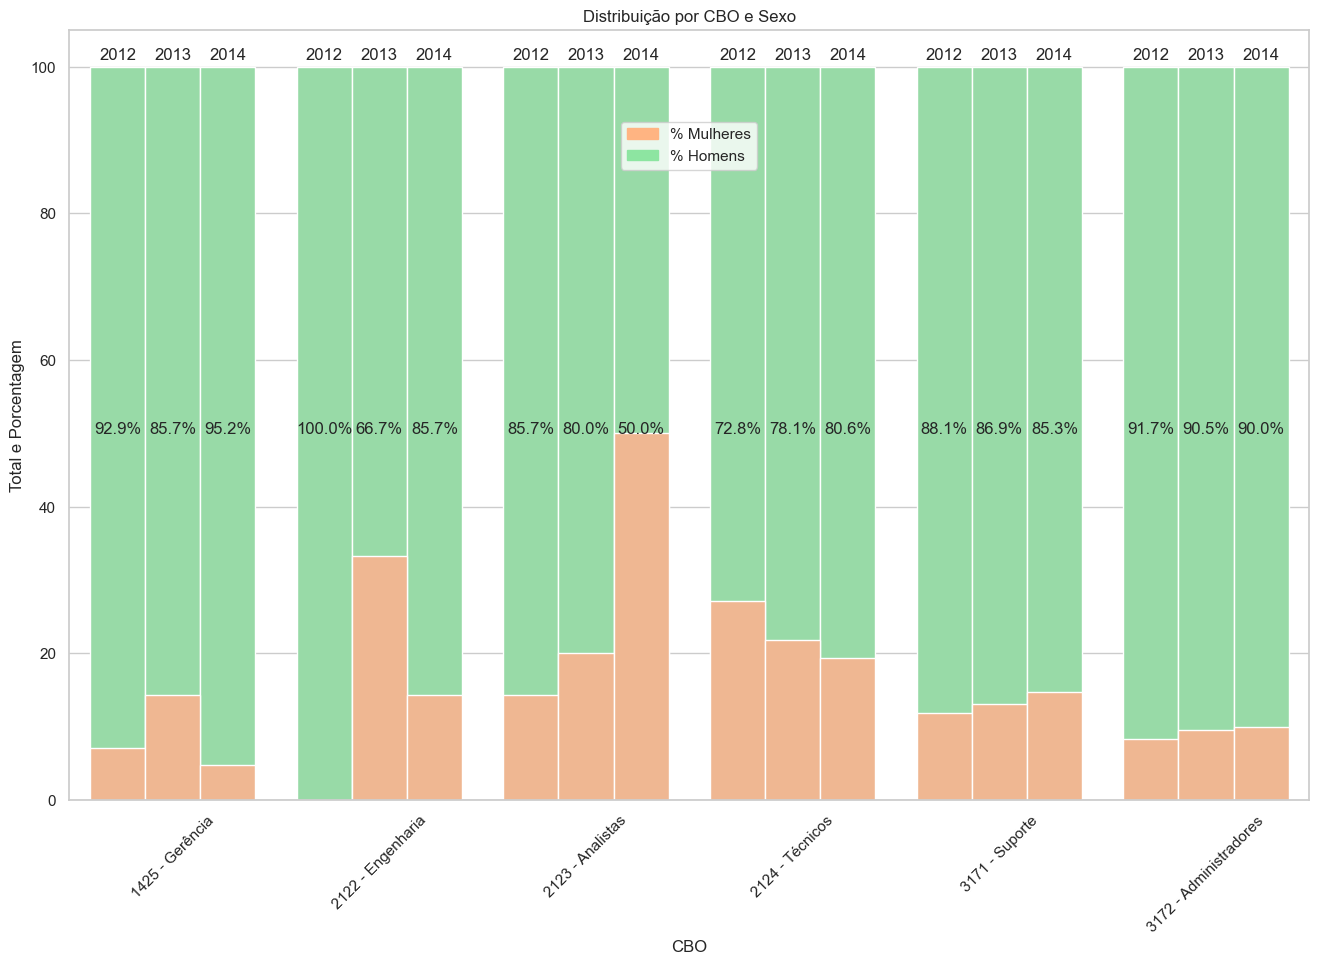

In [196]:
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib.patches as mpatches

# Configuração inicial do gráfico
plt.figure(figsize=(16, 10))
sns.set(style="whitegrid")

# Paleta de cores para as barras
palette_masc = {"2012": color_masc, "2013": color_masc, "2014": color_masc}
palette_fem = {"2012": color_fem, "2013": color_fem, "2014": color_fem}

# Verificar se as colunas necessárias estão no DataFrame
required_columns = ["CBO", "Total", "% Masc.", "% Fem.", "Ano"]
missing_columns = [col for col in required_columns if col not in RAIS_GERAL_QNT_GRAF.columns]

if missing_columns:
    print(f"As seguintes colunas estão faltando: {missing_columns}")
else:
    # Criação da barra para os homens (100%)
    bar1 = sns.barplot(x="CBO", y="Total", hue="Ano", data=RAIS_GERAL_QNT_GRAF, palette=palette_masc)

    # Captura das barras para as anotações
    patches = bar1.patches
    num_bars = min(len(patches), len(RAIS_GERAL_QNT_GRAF))

    # Adiciona a porcentagem dos homens para cada barra
    for i in range(num_bars):
        x = patches[i].get_x() + patches[i].get_width() / 2
        y = patches[i].get_height() / 2
        bar1.annotate('{:.1f}%'.format(RAIS_GERAL_QNT_GRAF["% Masc."].iloc[i]), (x, y), ha='center')

    # Adiciona o ano correspondente a cada barra
    for i in range(num_bars):
        x = patches[i].get_x() + patches[i].get_width() / 2
        y = patches[i].get_height() + 1
        bar1.annotate('{}'.format(RAIS_GERAL_QNT_GRAF["Ano"].iloc[i]), (x, y), ha='center')

    # Criação da segunda barra, representando a porcentagem de mulheres
    bar2 = sns.barplot(x="CBO", y="% Fem.", hue="Ano", data=RAIS_GERAL_QNT_GRAF, palette=palette_fem)

    # Captura das barras para as mulheres
    patches_fem = bar2.patches[len(patches):]
    num_bars_fem = min(len(patches_fem), len(RAIS_GERAL_QNT_GRAF))

    # Adiciona a porcentagem das mulheres em cada barra
    for i in range(num_bars_fem):
        x = patches_fem[i].get_x() + patches_fem[i].get_width() / 2
        y = patches_fem[i].get_height() / 2
        bar2.annotate('{:.1f}%'.format(RAIS_GERAL_QNT_GRAF["% Fem."].iloc[i]), (x, y), ha='center')

    # Configuração da legenda
    top_bar = mpatches.Patch(label='% Mulheres', color=color_fem)
    bottom_bar = mpatches.Patch(label='% Homens', color=color_masc)
    plt.legend(handles=[top_bar, bottom_bar], loc='center', bbox_to_anchor=(0.45, 0.8, 0.1, 0.1))

    # Configurações finais
    plt.title("Distribuição por CBO e Sexo")
    plt.xlabel("CBO")
    plt.ylabel("Total e Porcentagem")
    plt.xticks(rotation=45)

    # Salvamento do gráfico
    plt.savefig("./figures/svg/qnt_sexo_cbo.svg")
    plt.show()


## Análise das diferenças salariais conforme cada ocupação específica (CBOs):


### Distribuição da remuneração para cada sexo cruzado pela CBO:


In [92]:
# Criação da tabela para o boxplot para 2012
RAIS_GERAL_2012_BOX = RAIS_GERAL_2012.copy()  # Cria uma cópia para evitar problemas

# Substituição dos valores de "Sexo" e "CBO"
RAIS_GERAL_2012_BOX["Sexo"] = RAIS_GERAL_2012_BOX["Sexo"].replace(sexo)
RAIS_GERAL_2012_BOX["CBO"] = RAIS_GERAL_2012_BOX["CBO"].replace(cbo)

RAIS_GERAL_2012_BOX

,CBO,CNAE,Faixa Etária,Escolaridade,Idade,Mun Trab,Raça,Remuneração,Sexo
0,2124 - Técnicos,62031,4,6,26,355220,2,"9,467.34",Masc.
1,3171 - Suporte,62015,6,6,41,355220,2,"2,115.54",Masc.
2,3171 - Suporte,62015,5,7,39,355220,9,"2,142.81",Masc.
3,3171 - Suporte,62091,3,7,21,355220,2,"4,234.98",Masc.
4,2124 - Técnicos,63119,4,7,26,355220,9,"4,371.34",Masc.
...,...,...,...,...,...,...,...,...,...
331,3171 - Suporte,62015,3,9,22,355220,2,857.11,Fem.
332,2124 - Técnicos,62031,4,9,27,355220,2,"5,515.35",Fem.
333,2124 - Técnicos,62031,4,9,27,355220,2,"4,480.43",Fem.
334,2124 - Técnicos,62040,3,9,22,355220,9,"4,587.32",Fem.


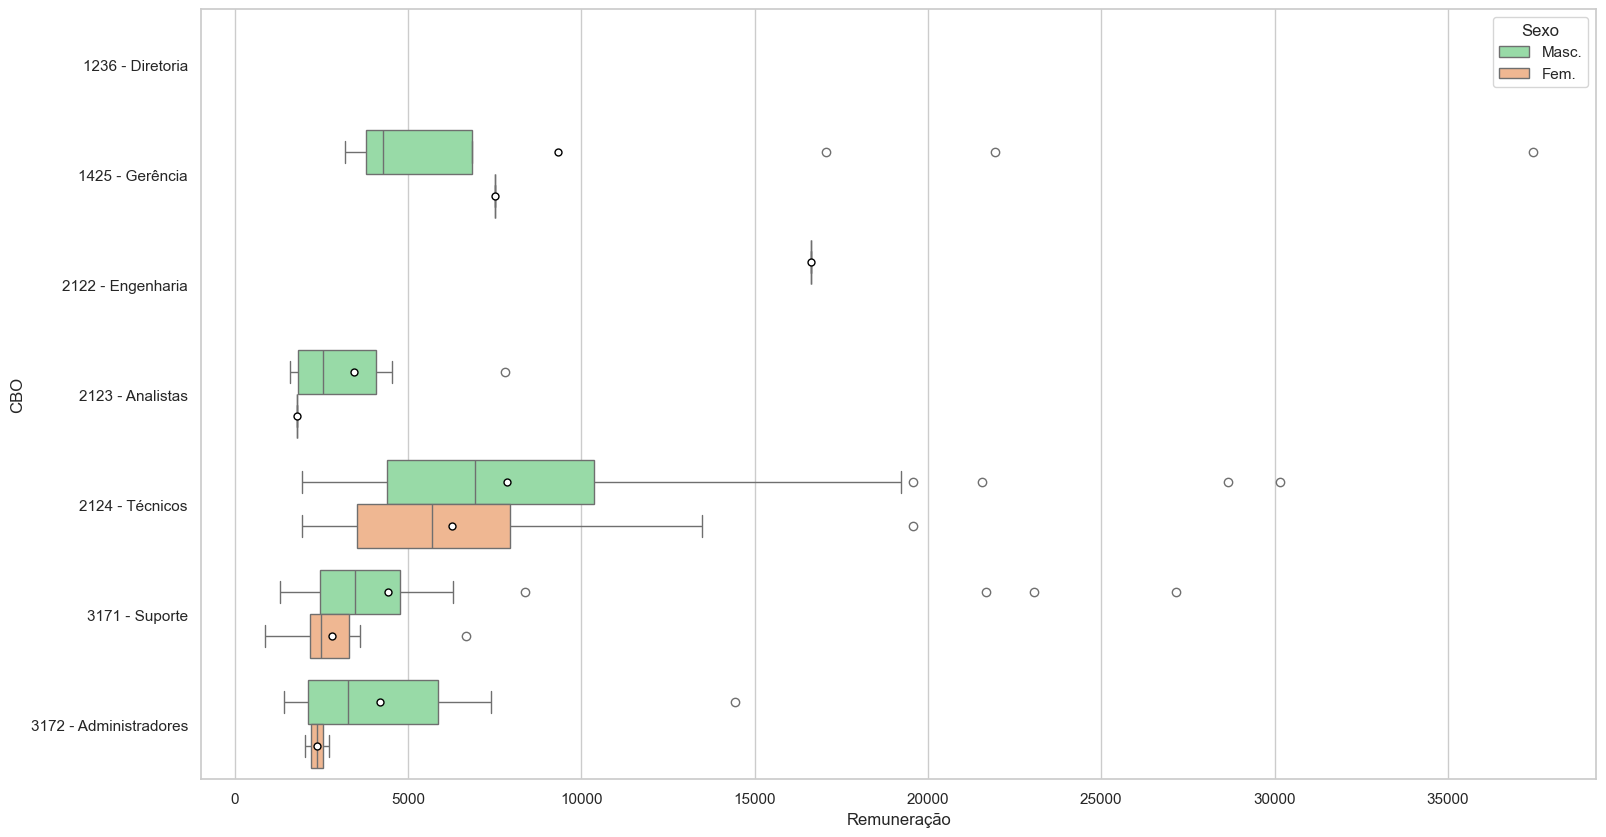

In [82]:
# Criação do boxplot para 2012:
box = sns.boxplot(x = 'Remuneração', y = 'CBO', hue = 'Sexo', data = RAIS_GERAL_2012, orient = 'h', showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"5"}, order = cbo.values(),
                       palette = {"Masc.": color_masc, "Fem.": color_fem})
box.figure.set_size_inches(18, 10)
box.figure.savefig("./figures/png/boxplot_sexo_cbo_2012.png", dpi = 300)

In [96]:
# Criação da tabela para o boxplot para 2013
RAIS_GERAL_2013_BOX = RAIS_GERAL_2013.copy()  # Cria uma cópia para evitar problemas

# Substituição dos valores de "Sexo" e "CBO"
RAIS_GERAL_2013_BOX["Sexo"] = RAIS_GERAL_2013_BOX["Sexo"].replace(sexo)
RAIS_GERAL_2013_BOX["CBO"] = RAIS_GERAL_2013_BOX["CBO"].replace(cbo)

RAIS_GERAL_2013_BOX

,CBO,CNAE,Faixa Etária,Escolaridade,Idade,Mun Trab,Raça,Remuneração,Sexo
0,1425 - Gerência,62015,4,5,28,355220,9,"7,542.34",Masc.
1,3171 - Suporte,62015,3,7,21,355220,9,"2,770.55",Masc.
2,2124 - Técnicos,62040,6,7,45,355220,2,"3,160.29",Masc.
3,2124 - Técnicos,62040,6,7,49,355220,2,"16,904.32",Masc.
4,2124 - Técnicos,62040,5,7,30,355220,4,"2,844.28",Masc.
...,...,...,...,...,...,...,...,...,...
441,3171 - Suporte,62015,3,9,21,355220,2,"2,280.27",Fem.
442,3172 - Administradores,62091,5,9,30,355220,2,"3,633.74",Fem.
443,2124 - Técnicos,63194,4,9,28,355220,2,"17,527.43",Fem.
444,2124 - Técnicos,62023,5,9,38,355220,2,"11,844.87",Fem.


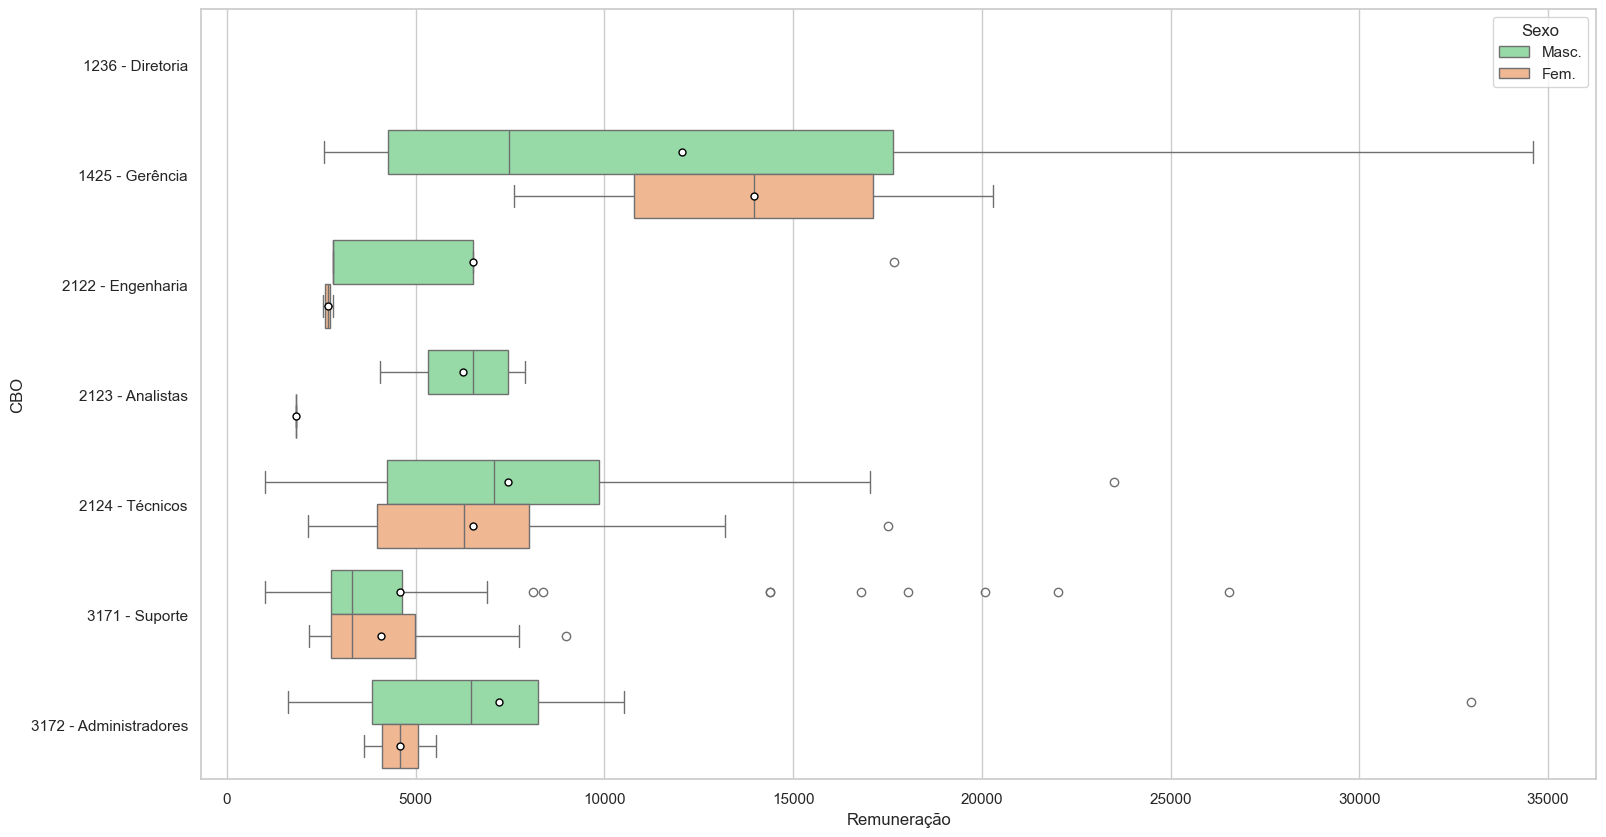

In [86]:
# Criação do boxplot para 2013:
box = sns.boxplot(x = 'Remuneração', y = 'CBO', hue = 'Sexo', data = RAIS_GERAL_2013, orient = 'h', showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"5"}, order = cbo.values(),
                       palette = {"Masc.": color_masc, "Fem.": color_fem})
box.figure.set_size_inches(18, 10)
box.figure.savefig("./figures/png/boxplot_sexo_cbo_2013.png", dpi = 300)

In [98]:
# Criação da tabela para o boxplot para 2014
RAIS_GERAL_2014_BOX = RAIS_GERAL_2014.copy()  # Cria uma cópia para evitar problemas

# Substituição dos valores de "Sexo" e "CBO"
RAIS_GERAL_2014_BOX["Sexo"] = RAIS_GERAL_2014_BOX["Sexo"].replace(sexo)
RAIS_GERAL_2014_BOX["CBO"] = RAIS_GERAL_2014_BOX["CBO"].replace(cbo)

RAIS_GERAL_2014_BOX

,CBO,CNAE,Faixa Etária,Escolaridade,Idade,Mun Trab,Raça,Remuneração,Sexo
0,2124 - Técnicos,62091,3,2,18,355220,2,"2,630.94",Masc.
1,3171 - Suporte,62015,5,6,34,355220,9,"2,236.50",Masc.
2,3171 - Suporte,62015,3,6,20,355220,9,"2,342.38",Masc.
3,3171 - Suporte,62015,4,6,25,355220,9,"2,654.54",Masc.
4,3171 - Suporte,62091,4,7,28,355220,2,"3,520.11",Masc.
...,...,...,...,...,...,...,...,...,...
530,2124 - Técnicos,62040,3,9,23,355220,2,"2,602.64",Fem.
531,2124 - Técnicos,62040,3,9,23,355220,2,"4,647.39",Fem.
532,2124 - Técnicos,62031,4,9,29,355220,2,"6,041.21",Fem.
533,2124 - Técnicos,62031,5,9,32,355220,2,"5,551.56",Fem.


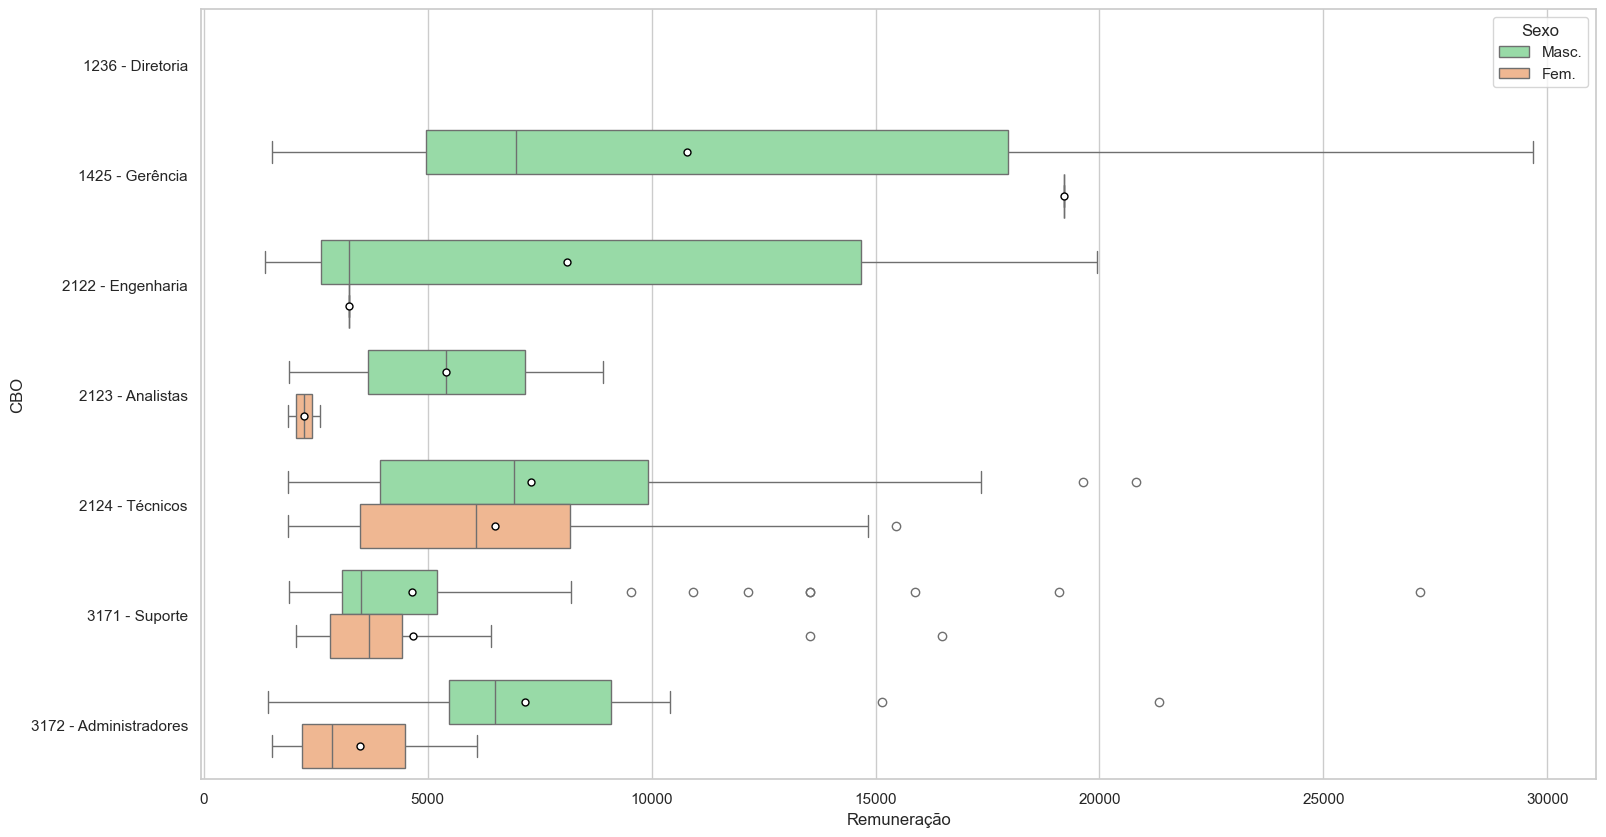

In [90]:
# Criação do boxplot para 2014:
box = sns.boxplot(x = 'Remuneração', y = 'CBO', hue = 'Sexo', data = RAIS_GERAL_2014, orient = 'h', showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"5"}, order = cbo.values(),
                       palette = {"Masc.": color_masc, "Fem.": color_fem})
box.figure.set_size_inches(18, 10)
box.figure.savefig("./figures/png/boxplot_sexo_cbo_2014.png", dpi = 300)

### Criação das tabelas com as diferenças salarias e da tabela para geração do gráfico:


In [101]:
# Tabela principal para média e diferença salarial em 2012:
RAIS_GERAL_2012_MEDIA = pd.crosstab(RAIS_GERAL_2012["CBO"].replace(cbo), RAIS_GERAL_2012["Sexo"].replace(sexo), values = RAIS_GERAL_2012.Remuneração, aggfunc = 'mean')
RAIS_GERAL_2012_MEDIA.insert(2, "Diferença Salarial", ((RAIS_GERAL_2012_MEDIA["Fem."] - RAIS_GERAL_2012_MEDIA["Masc."]) / RAIS_GERAL_2012_MEDIA["Masc."]) * 100)

RAIS_GERAL_2012_MEDIA.head(7)

Sexo,Fem.,Masc.,Diferença Salarial
CBO,,,
1425 - Gerência,"7,510.37","9,322.03",-19.43
2122 - Engenharia,NaN,"16,614.38",NaN
2123 - Analistas,"1,788.28","3,440.19",-48.02
2124 - Técnicos,"6,259.44","7,858.97",-20.35
3171 - Suporte,"2,809.45","4,417.72",-36.40
3172 - Administradores,"2,357.13","4,186.68",-43.70


In [103]:
# Tabela principal para média e diferença salarial em 2013:
RAIS_GERAL_2013_MEDIA = pd.crosstab(RAIS_GERAL_2013["CBO"].replace(cbo), RAIS_GERAL_2013["Sexo"].replace(sexo), values = RAIS_GERAL_2013.Remuneração, aggfunc = 'mean')
RAIS_GERAL_2013_MEDIA.insert(2, "Diferença Salarial", ((RAIS_GERAL_2013_MEDIA["Fem."] - RAIS_GERAL_2013_MEDIA["Masc."]) / RAIS_GERAL_2013_MEDIA["Masc."]) * 100)

RAIS_GERAL_2013_MEDIA.head(7)

Sexo,Fem.,Masc.,Diferença Salarial
CBO,,,
1425 - Gerência,"13,953.03","12,065.75",15.64
2122 - Engenharia,"2,673.40","6,521.52",-59.01
2123 - Analistas,"1,844.99","6,255.76",-70.51
2124 - Técnicos,"6,518.49","7,451.15",-12.52
3171 - Suporte,"4,075.74","4,574.13",-10.90
3172 - Administradores,"4,584.36","7,217.08",-36.48


In [107]:
# Tabela principal para média e diferença salarial em 2014:
RAIS_GERAL_2014_MEDIA = pd.crosstab(RAIS_GERAL_2014["CBO"].replace(cbo), RAIS_GERAL_2014["Sexo"].replace(sexo), values = RAIS_GERAL_2014.Remuneração, aggfunc = 'mean')
RAIS_GERAL_2014_MEDIA.insert(2, "Diferença Salarial", ((RAIS_GERAL_2014_MEDIA["Fem."] - RAIS_GERAL_2014_MEDIA["Masc."]) / RAIS_GERAL_2014_MEDIA["Masc."]) * 100)

RAIS_GERAL_2014_MEDIA.head(7)

Sexo,Fem.,Masc.,Diferença Salarial
CBO,,,
1425 - Gerência,"19,204.40","10,782.08",78.11
2122 - Engenharia,"3,238.84","8,113.15",-60.08
2123 - Analistas,"2,239.14","5,410.38",-58.61
2124 - Técnicos,"6,499.59","7,308.61",-11.07
3171 - Suporte,"4,662.00","4,646.47",0.33
3172 - Administradores,"3,492.08","7,178.72",-51.36


In [109]:
RAIS_GERAL_2012_MEDIA.insert(3, "Ano", "2012")

RAIS_GERAL_2013_MEDIA.insert(3, "Ano", "2013")

RAIS_GERAL_2014_MEDIA.insert(3, "Ano", "2014")

RAIS_GERAL_MEDIA_GRAF = pd.concat([RAIS_GERAL_2012_MEDIA, RAIS_GERAL_2013_MEDIA,RAIS_GERAL_2014_MEDIA ]).reset_index()

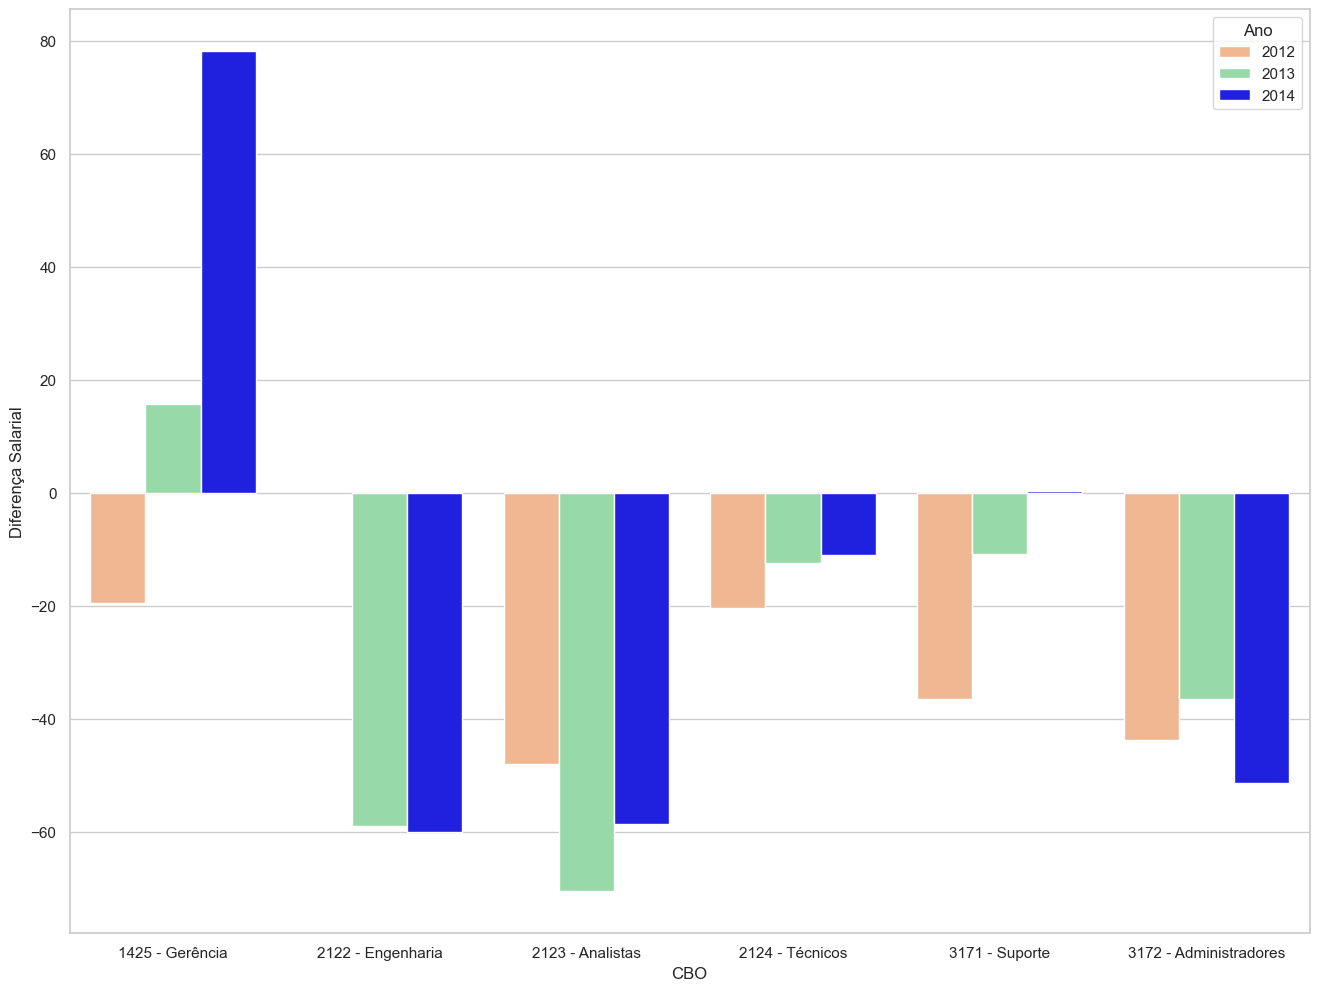

In [157]:
# Criação do gráfico inicial:
plt.figure(figsize=(16, 12))  # Aumentando a largura e a altura do gráfico

# Configuração do grid do gráfico:
sns.set(style="whitegrid")

# Criação da barra referente às diferenças salariais:
bar = sns.barplot(
    x="CBO", 
    y="Diferença Salarial", 
    hue="Ano", 
    data=RAIS_GERAL_MEDIA_GRAF, 
    palette={"2012": color_fem, "2013": color_masc, "2014": "blue"}
)

# Captura da quantidade de barras existentes:
patches = bar.patches

# Preenchimento das porcentagens das diferenças salariais em cada barra:
for patch in patches:
    # Obtém a posição x e y da barra
    x = patch.get_x() + patch.get_width() / 2
    y = patch.get_height()

    # Exemplo: Se cada barra for de um ano diferente, você pode precisar de um mapeamento
    year = patch.get_label()  # Acessa a label da barra para determinar o ano
    index = RAIS_GERAL_MEDIA_GRAF.index[(RAIS_GERAL_MEDIA_GRAF["CBO"] == patch.get_x()) & (RAIS_GERAL_MEDIA_GRAF["Ano"] == year)]
    
    if not index.empty:
        difference_salary = RAIS_GERAL_MEDIA_GRAF.loc[index, "Diferença Salarial"].values[0]
        bar.annotate('{:.1f}%'.format(difference_salary), (x, y), ha='center')

# Salvando o gráfico em formato SVG
plt.savefig("./figures/svg/dif_salarial_sexo_cbo_media.svg")


In [117]:
# Tabela principal para mediana e diferença salarial em 2012:
RAIS_GERAL_2012_MEDIANA = pd.crosstab(RAIS_GERAL_2012["CBO"].replace(cbo), RAIS_GERAL_2012["Sexo"].replace(sexo), values = RAIS_GERAL_2012.Remuneração, aggfunc = 'median')
RAIS_GERAL_2012_MEDIANA.insert(2, "Diferença Salarial", ((RAIS_GERAL_2012_MEDIANA["Fem."] - RAIS_GERAL_2012_MEDIANA["Masc."]) / RAIS_GERAL_2012_MEDIANA["Masc."]) * 100)

RAIS_GERAL_2012_MEDIANA.head(7)

Sexo,Fem.,Masc.,Diferença Salarial
CBO,,,
1425 - Gerência,"7,510.37","4,278.67",75.53
2122 - Engenharia,NaN,"16,614.38",NaN
2123 - Analistas,"1,788.28","2,532.42",-29.38
2124 - Técnicos,"5,703.39","6,941.33",-17.83
3171 - Suporte,"2,472.68","3,466.62",-28.67
3172 - Administradores,"2,357.13","3,256.44",-27.62


In [119]:
# Tabela principal para mediana e diferença salarial em 2013:
RAIS_GERAL_2013_MEDIANA = pd.crosstab(RAIS_GERAL_2013["CBO"].replace(cbo), RAIS_GERAL_2013["Sexo"].replace(sexo), values = RAIS_GERAL_2013.Remuneração, aggfunc = 'median')
RAIS_GERAL_2013_MEDIANA.insert(2, "Diferença Salarial", ((RAIS_GERAL_2013_MEDIANA["Fem."] - RAIS_GERAL_2013_MEDIANA["Masc."]) / RAIS_GERAL_2013_MEDIANA["Masc."]) * 100)

RAIS_GERAL_2013_MEDIANA.head(7)

Sexo,Fem.,Masc.,Diferença Salarial
CBO,,,
1425 - Gerência,"13,953.03","7,461.16",87.01
2122 - Engenharia,"2,673.40","2,800.70",-4.55
2123 - Analistas,"1,844.99","6,533.74",-71.76
2124 - Técnicos,"6,283.46","7,072.75",-11.16
3171 - Suporte,"3,306.71","3,320.99",-0.43
3172 - Administradores,"4,584.36","6,457.48",-29.01


In [121]:
# Tabela principal para mediana e diferença salarial em 2014:
RAIS_GERAL_2014_MEDIANA = pd.crosstab(RAIS_GERAL_2014["CBO"].replace(cbo), RAIS_GERAL_2014["Sexo"].replace(sexo), values = RAIS_GERAL_2014.Remuneração, aggfunc = 'median')
RAIS_GERAL_2014_MEDIANA.insert(2, "Diferença Salarial", ((RAIS_GERAL_2014_MEDIANA["Fem."] - RAIS_GERAL_2014_MEDIANA["Masc."]) / RAIS_GERAL_2014_MEDIANA["Masc."]) * 100)

RAIS_GERAL_2014_MEDIANA.head(7)

Sexo,Fem.,Masc.,Diferença Salarial
CBO,,,
1425 - Gerência,"19,204.40","6,965.60",175.70
2122 - Engenharia,"3,238.84","3,238.84",0.00
2123 - Analistas,"2,239.14","5,410.38",-58.61
2124 - Técnicos,"6,072.84","6,929.03",-12.36
3171 - Suporte,"3,681.86","3,502.48",5.12
3172 - Administradores,"2,859.44","6,502.85",-56.03


In [123]:
RAIS_GERAL_2012_MEDIANA.insert(3, "Ano", "2012")

RAIS_GERAL_2013_MEDIANA.insert(3, "Ano", "2013")

RAIS_GERAL_2014_MEDIANA.insert(3, "Ano", "2014")

RAIS_GERAL_MEDIANA_GRAF = pd.concat([RAIS_GERAL_2012_MEDIANA, RAIS_GERAL_2013_MEDIANA,RAIS_GERAL_2014_MEDIANA ]).reset_index()

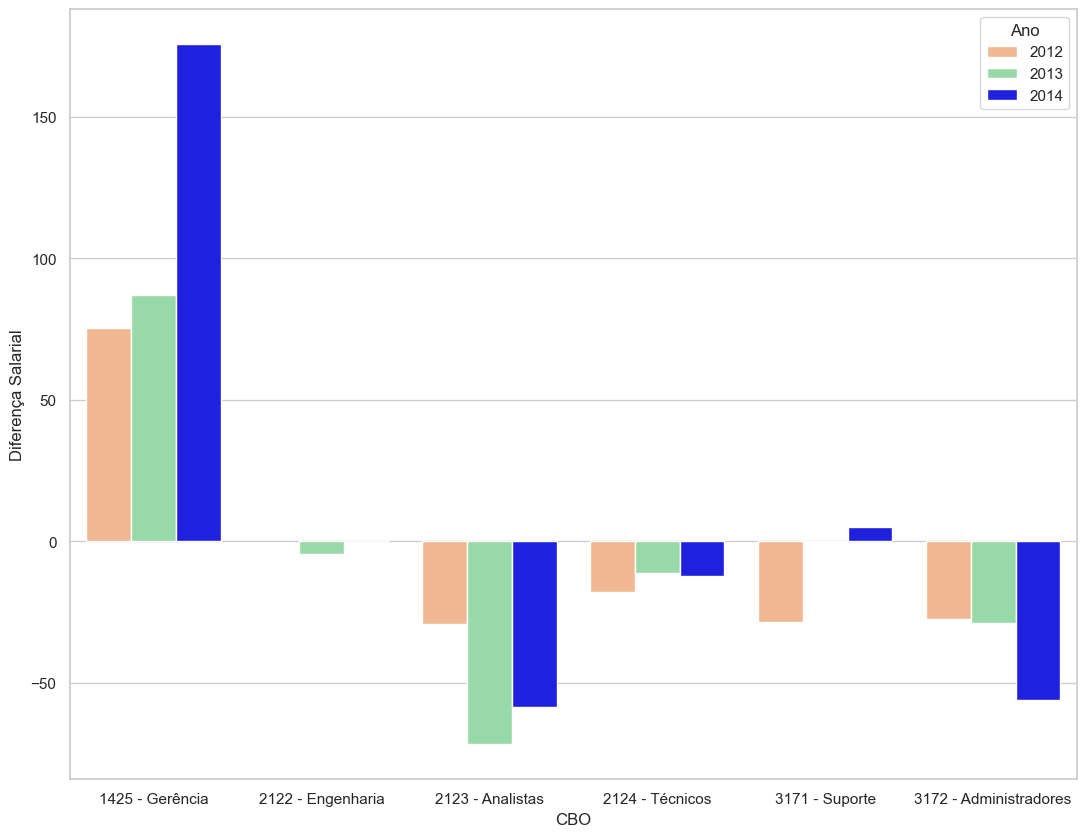

In [161]:
# Criação do gráfico inicial:
plt.figure(figsize=(13, 10))  # Definindo o tamanho do gráfico

# Configuração do grid do gráfico:
sns.set(style="whitegrid")

# Criação da barra referente às diferenças salariais:
bar = sns.barplot(
    x="CBO", 
    y="Diferença Salarial", 
    hue="Ano", 
    data=RAIS_GERAL_MEDIANA_GRAF, 
    palette={"2012": color_fem, "2013": color_masc, "2014": "blue"}
)

# Captura da quantidade de barras existentes:
patches = bar.patches

# Preenchimento das porcentagens das diferenças salariais em cada barra:
for patch in patches:
    x = patch.get_x() + patch.get_width() / 2  # Posição X do centro da barra
    y = patch.get_height()  # Altura da barra

    year = patch.get_label()  # Pega a label (Ano) da barra
    index = RAIS_GERAL_MEDIANA_GRAF.index[
        (RAIS_GERAL_MEDIANA_GRAF["CBO"] == patch.get_x()) & 
        (RAIS_GERAL_MEDIANA_GRAF["Ano"] == year)
    ]

    if not index.empty:
        # Acessa o valor da "Diferença Salarial" correspondente à barra
        difference_salary = RAIS_GERAL_MEDIANA_GRAF.loc[index, "Diferença Salarial"].values[0]
        # Adiciona a anotação na barra
        bar.annotate('{:.1f}%'.format(difference_salary), (x, y), ha='center')

# Salvando o gráfico em formato SVG
plt.savefig("./figures/svg/dif_salarial_sexo_cbo_mediana.svg")


### Teste de hipótese para cada grupo de médias por CBOs:


In [164]:
def teste_hipotese(first_data, second_data, confidence_interval):
    from scipy.stats import mannwhitneyu 
    
    stat, p_valor = mannwhitneyu(first_data, second_data, alternative = 'less')
    
    if p_valor <= confidence_interval:
        return stat, p_valor, 'Medianas estatisticamente diferentes'
    else:
        return stat, p_valor, 'Medianas estatisticamente iguais'

In [168]:
TESTE_HIP_2012 = pd.DataFrame(columns=['Estat. Mann-Whitney', 'pValor', 'Resultado Estat.'])

for ocup in cbo:
    df1 = RAIS_GERAL_2012.query("Sexo == 'Masc.'").replace(cbo).query("CBO == '{}'".format(cbo[ocup])).Remuneração
    df2 = RAIS_GERAL_2012.query("Sexo == 'Fem.'").replace(cbo).query("CBO == '{}'".format(cbo[ocup])).Remuneração
    
    # Verifica se df1 e df2 têm dados suficientes
    if not df1.empty and not df2.empty:
        mean1 = df1.median()
        mean2 = df2.median()

        if mean1 < mean2:
            stat, p, result = teste_hipotese(df1, df2, nivel_confianca)
        else:
            stat, p, result = teste_hipotese(df2, df1, nivel_confianca)

        # Adiciona os resultados ao DataFrame
        TESTE_HIP_2012.loc[cbo[ocup]] = [str(stat), '0.01 > {:.5f}...'.format(p), result]
    else:
        # Adiciona uma linha com valores nulos ou uma mensagem de erro
        TESTE_HIP_2012.loc[cbo[ocup]] = [None, 'Sem dados suficientes', 'Não aplicável']

RAIS_GERAL_2012_HIP = pd.merge(RAIS_GERAL_2012_MEDIA, TESTE_HIP_2012, left_index=True, right_index=True)
RAIS_GERAL_2012_HIP.drop('Diferença Salarial', inplace=True, axis=1)
RAIS_GERAL_2012_HIP.drop('Ano', inplace=True, axis=1)

RAIS_GERAL_2012_HIP.head(7)


,Fem.,Masc.,Estat. Mann-Whitney,pValor,Resultado Estat.
1425 - Gerência,"7,510.37","9,322.03",3.0,0.01 > 0.28571...,Medianas estatisticamente iguais
2122 - Engenharia,NaN,"16,614.38",None,Sem dados suficientes,Não aplicável
2123 - Analistas,"1,788.28","3,440.19",2.0,0.01 > 0.42857...,Medianas estatisticamente iguais
2124 - Técnicos,"6,259.44","7,858.97",3354.0,0.01 > 0.01317...,Medianas estatisticamente iguais
3171 - Suporte,"2,809.45","4,417.72",238.0,0.01 > 0.03465...,Medianas estatisticamente iguais
3172 - Administradores,"2,357.13","4,186.68",10.5,0.01 > 0.12338...,Medianas estatisticamente iguais


In [170]:
TESTE_HIP_2013 = pd.DataFrame(columns=['Estat. Mann-Whitney', 'pValor', 'Resultado Estat.'])

for ocup in cbo:
    df1 = RAIS_GERAL_2013.query("Sexo == 'Masc.'").replace(cbo).query("CBO == '{}'".format(cbo[ocup])).Remuneração
    df2 = RAIS_GERAL_2013.query("Sexo == 'Fem.'").replace(cbo).query("CBO == '{}'".format(cbo[ocup])).Remuneração
    
    # Verifica se df1 e df2 têm dados suficientes
    if not df1.empty and not df2.empty:
        mean1 = df1.median()
        mean2 = df2.median()

        if mean1 < mean2:
            stat, p, result = teste_hipotese(df1, df2, nivel_confianca)
        else:
            stat, p, result = teste_hipotese(df2, df1, nivel_confianca)

        # Adiciona os resultados ao DataFrame
        TESTE_HIP_2013.loc[cbo[ocup]] = [str(stat), '0.01 > {:.5f}...'.format(p), result]
    else:
        # Adiciona uma linha com valores nulos ou uma mensagem de erro
        TESTE_HIP_2013.loc[cbo[ocup]] = [None, 'Sem dados suficientes', 'Não aplicável']

RAIS_GERAL_2013_HIP = pd.merge(RAIS_GERAL_2013_MEDIA, TESTE_HIP_2013, left_index=True, right_index=True)
RAIS_GERAL_2013_HIP.drop('Diferença Salarial', inplace=True, axis=1)
RAIS_GERAL_2013_HIP.drop('Ano', inplace=True, axis=1)

RAIS_GERAL_2013_HIP.head(7)


,Fem.,Masc.,Estat. Mann-Whitney,pValor,Resultado Estat.
1425 - Gerência,"13,953.03","12,065.75",8.0,0.01 > 0.27473...,Medianas estatisticamente iguais
2122 - Engenharia,"2,673.40","6,521.52",1.5,0.01 > 0.13666...,Medianas estatisticamente iguais
2123 - Analistas,"1,844.99","6,255.76",0.0,0.01 > 0.20000...,Medianas estatisticamente iguais
2124 - Técnicos,"6,518.49","7,451.15",5439.0,0.01 > 0.06937...,Medianas estatisticamente iguais
3171 - Suporte,"4,075.74","4,574.13",996.0,0.01 > 0.59824...,Medianas estatisticamente iguais
3172 - Administradores,"4,584.36","7,217.08",11.0,0.01 > 0.18374...,Medianas estatisticamente iguais


In [172]:
TESTE_HIP_2014 = pd.DataFrame(columns=['Estat. Mann-Whitney', 'pValor', 'Resultado Estat.'])

for ocup in cbo:
    df1 = RAIS_GERAL_2014.query("Sexo == 'Masc.'").replace(cbo).query("CBO == '{}'".format(cbo[ocup])).Remuneração
    df2 = RAIS_GERAL_2014.query("Sexo == 'Fem.'").replace(cbo).query("CBO == '{}'".format(cbo[ocup])).Remuneração
    
    # Verifica se df1 e df2 têm dados suficientes
    if not df1.empty and not df2.empty:
        mean1 = df1.median()
        mean2 = df2.median()

        if mean1 < mean2:
            stat, p, result = teste_hipotese(df1, df2, nivel_confianca)
        else:
            stat, p, result = teste_hipotese(df2, df1, nivel_confianca)

        # Adiciona os resultados ao DataFrame
        TESTE_HIP_2014.loc[cbo[ocup]] = [str(stat), '0.01 > {:.5f}...'.format(p), result]
    else:
        # Adiciona uma linha com valores nulos ou uma mensagem de erro
        TESTE_HIP_2014.loc[cbo[ocup]] = [None, 'Sem dados suficientes', 'Não aplicável']

RAIS_GERAL_2014_HIP = pd.merge(RAIS_GERAL_2014_MEDIA, TESTE_HIP_2014, left_index=True, right_index=True)
RAIS_GERAL_2014_HIP.drop('Diferença Salarial', inplace=True, axis=1)
RAIS_GERAL_2014_HIP.drop('Ano', inplace=True, axis=1)

RAIS_GERAL_2014_HIP.head(7)


,Fem.,Masc.,Estat. Mann-Whitney,pValor,Resultado Estat.
1425 - Gerência,"19,204.40","10,782.08",4.0,0.01 > 0.23810...,Medianas estatisticamente iguais
2122 - Engenharia,"3,238.84","8,113.15",3.0,0.01 > 0.60235...,Medianas estatisticamente iguais
2123 - Analistas,"2,239.14","5,410.38",1.0,0.01 > 0.33333...,Medianas estatisticamente iguais
2124 - Técnicos,"6,499.59","7,308.61",7400.5,0.01 > 0.05247...,Medianas estatisticamente iguais
3171 - Suporte,"4,662.00","4,646.47",1369.5,0.01 > 0.69421...,Medianas estatisticamente iguais
3172 - Administradores,"3,492.08","7,178.72",14.5,0.01 > 0.03887...,Medianas estatisticamente iguais
